<a href="https://colab.research.google.com/github/shree180103/fashion_mnist_cnn/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import transforms # gives functions for manipuilating  images
from torchvision.transforms import ToTensor # used converting img or numpy to tensor
from torch.utils.data import DataLoader # used to create pyton iterables over datset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




## getting our data

In [3]:
# setup training data
from torchvision import datasets

train_data=datasets.FashionMNIST(root="data",# where to download data to
                                 train=True,# do we want training data
                                 download=True,
                                 transform=torchvision.transforms.ToTensor(),
                                 target_transform=None # do we want to transform our target
                                 )
test_data=datasets.FashionMNIST(root="data",# where to download data to
                                 train=False,# do we want training data, if false then gives test data
                                 download=True,
                                 transform=torchvision.transforms.ToTensor(),
                                 target_transform=None # do we want to transform our target
                                 )


100%|██████████| 26421880/26421880 [00:01<00:00, 16333782.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 303839.59it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5441970.68it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14158870.16it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
# see the first training examples

image,label=train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [6]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_name_idx=train_data.class_to_idx
class_name_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## visulizing our data

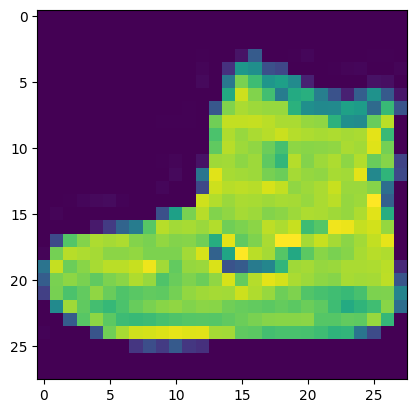

In [8]:
plt.imshow(image.squeeze()) # matplotlib requires (h,w) or (h,w,c) but not (c,h,w)

Text(0.5, 1.0, 'Ankle boot')

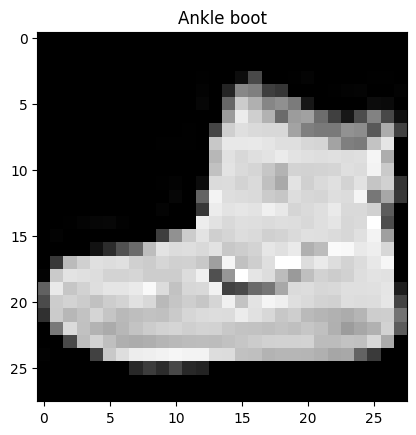

In [9]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

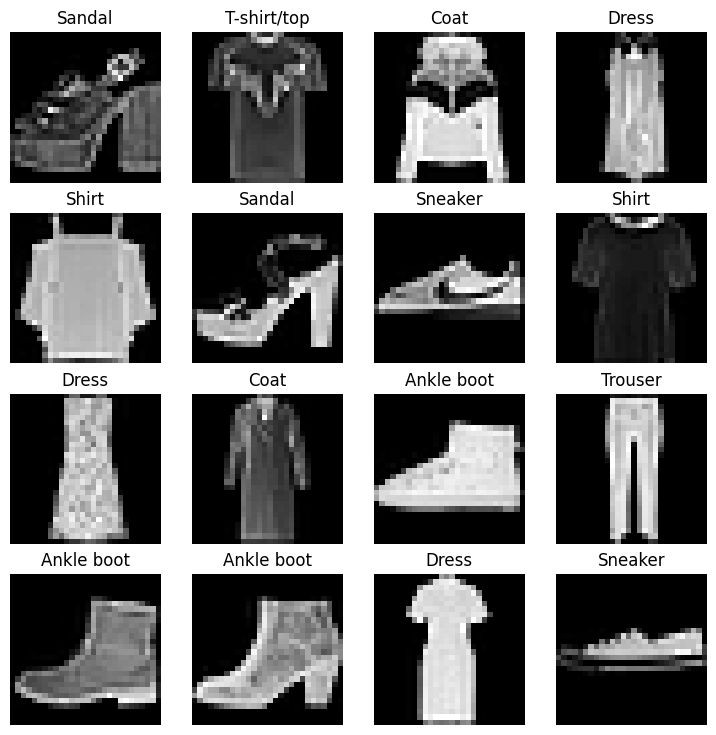

In [10]:
# plot more images
# torch.manual_seed(42)
plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  plt.subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [11]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

##prepare dataloader

right now our dataset is in the form of pytorch dataset

dataloader turns our dataset into a pyton itterable

more specifically, we want to turn our data into mini batches

In [15]:
train_dataloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)

test_dataloader=DataLoader(dataset=test_data,batch_size=32,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b6e7259bd90>,
 <torch.utils.data.dataloader.DataLoader at 0x7b6e7259b400>)

In [16]:
len(train_dataloader) #thus 1875 batches of 32 training samples

1875

In [18]:
len(test_dataloader) # thus 313 batches of approx 32 testing samples

313

In [19]:
#lets check whats inside the train data loader

train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])


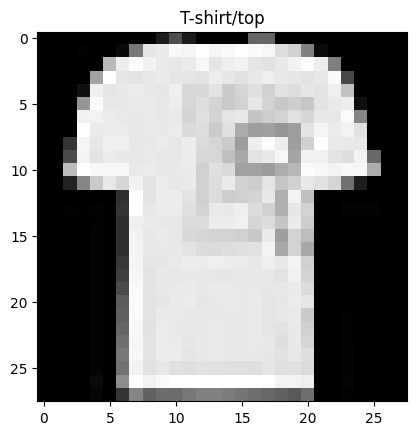

In [41]:
#show a sample
# torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
print(img.shape)


In [56]:
#building a baseline model

class FashionMNISTmodel0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,out_features=hidden_units),
      nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


model=FashionMNISTmodel0(input_shape=28*28,hidden_units=10,output_shape=len(class_names))
model


FashionMNISTmodel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [46]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0053, -0.0167,  0.0091,  ..., -0.0241,  0.0349, -0.0072],
                      [ 0.0142, -0.0319,  0.0206,  ..., -0.0304,  0.0081,  0.0005],
                      [ 0.0217,  0.0023,  0.0029,  ...,  0.0071,  0.0319, -0.0184],
                      ...,
                      [-0.0126, -0.0093,  0.0024,  ...,  0.0224, -0.0069,  0.0233],
                      [-0.0008, -0.0126, -0.0139,  ..., -0.0216,  0.0082,  0.0110],
                      [ 0.0066,  0.0330,  0.0033,  ...,  0.0238,  0.0122, -0.0257]])),
             ('layer_stack.1.bias',
              tensor([-0.0120,  0.0228,  0.0321, -0.0169,  0.0152, -0.0084,  0.0227, -0.0054,
                      -0.0284, -0.0354])),
             ('layer_stack.2.weight',
              tensor([[-0.0118,  0.0932, -0.1864,  0.2488,  0.1500,  0.1907,  0.1457, -0.3050,
                       -0.0580,  0.1643],
                      [ 0.1565, -0.2877, -0.1792,  0.2305, -0.2618,  0.2397, -0.

In [47]:
dummy_x=torch.rand([1,1,28,28])
model(dummy_x)

tensor([[-0.1346, -0.1822,  0.4106,  0.0670, -0.5223, -0.3235,  0.1189, -0.2083,
          0.2132, -0.1851]], grad_fn=<AddmmBackward0>)

In [48]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [57]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [49]:
from os import P_PID
import requests
import pathlib
from pathlib import Path

# download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

downloading helper_functions.py


In [50]:
from helper_functions import accuracy_fn

## creating a function to time our experiments

ML is very experimental

the 2 main things we often track is :

1.the models performance (loss and accuracy)

2.how fast it runs

note: usually model peromance and time taken by model our inversely related


In [66]:
from timeit import default_timer as Timer

def train_time(start:float,end:float):
  # """ prints the difference btw the strt and end time"""

  total_time=end-start
  print(f" Train time is: {total_time:.3f} seconds")
  return total_time


In [70]:
start_time=Timer()

end_time=Timer()

train_time(start_time,end_time)


 Train time is: 0.000 seconds


4.832600006920984e-05

# creating training loop and training a model on batches of data

In [71]:
# import tqdm # a progress bar for epochs

# from tqdm.auto import tqdm

# torch.manual_seed(42)
# train_time_start=Timer()
# epochs=3

# for i in tqdm(range(epochs)):
#   print(f"Epoch:{epoch}\n------")
#   train_loss=0
#   model.train()
#   # add a loop to loop through our training batches
#   for batch,(x,y) in enumerate(train_dataloader):


